## Homework 02

SOLVED by ANGELA CARRARO

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

**Solution.**

Let us define the variable $I$ (illness) that can take values in $\{0, 1\}$: if $I = 1$ the person has the coronavirus, while if $I = 0$ the person doesn't have it. Then we define the varible $T$ (test) that can also take values in $\{0, 1\}$: if $T = 1$ the test is positive, while if $I = 0$ the test is negative.

Since one half percent of the population has the coronavirus, we have that

$$
P(I = 1) = 0.5\% = 0.005 \\
P(I = 0) = 1 - P(I = 1) = 1 - 0.005 = 0.995
$$

Besides, the test gives a false positive $0.3\%$ of the time and a false negative $2\%$ of the time, so we have that

$$
P(T = 1 \mid I = 0) = 3\% = 0.03\\
P(T = 0 \mid I = 1) = 2\% = 0.02
$$

1. So we can compute the probability that Luca is positive to the test, that means the probability of the test being positive:

$$
\begin{align}
\mathrm{P}(T = 1) &= \mathrm{P}(T = 1 \mid I = 0) \cdot \mathrm{P}(I = 0) + \mathrm{P}(T = 1 \mid I = 1) \cdot \mathrm{P}(I = 1) \\
&= \mathrm{P}(T = 1 \mid I = 0) \cdot \mathrm{P}(I = 0) + (1 - \mathrm{P}(T = 0 \mid I = 1)) \cdot \mathrm{P}(I = 1) \\
&= 0.03 \cdot 0.995 + (1 - 0.02) \cdot 0.005 \\
&= 0.02985 + 0.0049 = 0.03475 = 3.48 \%
\end{align}
$$

2. If we suppose that Luca is positive to the test, the probability that he has contracted the disease is the probability of having the illness conditioned for the fact that the test is positive:

$$
\mathrm{P}(I = 1 \mid T = 1) = \frac{\mathrm{P}(T = 1 \mid I = 1) \cdot \mathrm{P}(I = 1)}{\mathrm{P}(T = 1)} = \frac{(1 - \mathrm{P}(T = 0 \mid I = 1)) \cdot \mathrm{P}(I = 1)}{\mathrm{P}(T = 1)} = \frac{(1 - 0.02) \cdot 0.005}{0.03475} = 0.141 = 14.1\%
$$

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x)$.

**Solution.**

The **cumulative distribution function** of a real-valued random variable ${\displaystyle X}$ is the function given by

$$
{\displaystyle F_{X}(x)=\operatorname {P} (X\leq x)}
$$

where the right-hand side represents the probability that the random variable ${\displaystyle X}$ takes on a value less than or equal to ${\displaystyle x}$.

The CDF of a continuous random variable ${\displaystyle X}$ can be expressed as the integral of its probability density function ${\displaystyle f_{X}}$ as follows:

$$
{\displaystyle F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt.}
$$

Instead, the **empirical cumulative distribution function** is defined as:

$$
\widehat{F}_n(x) = \dfrac{\text{number of elements of } y \leq x}{n} \, .
$$

Under some mild conditions, $\widehat{F}_n(t)$ converges to the true cumulative distribution function $F(x)$.

Sio we can build the following function:

In [51]:
def cdf(dist, x):
    n = 10000
    sample = [pyro.sample("n", dist) for i in range(n)]
    min_of_x = 0
    for i in range(n):
        if (sample[i].item() < x):
            min_of_x += 1
    
    return min_of_x/n

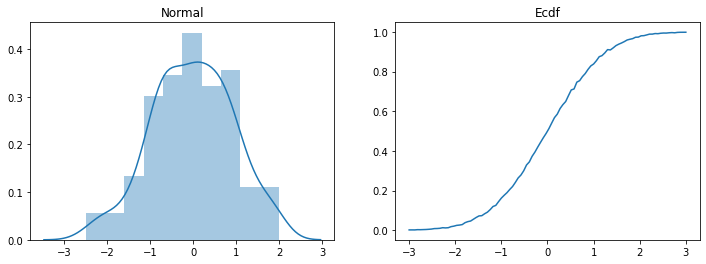

In [65]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pyro.distributions as dist

X =  dist.Normal(0, 1)
normal_sample = [pyro.sample("n", X) for i in range(200)]
xx = linspace(-3.0, 3.0, 100)
cdf_sample = [cdf(X, x) for x in xx]
print

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(normal_sample, ax=axes[0])
plt.plot(xx, cdf_sample)
axes[0].set_title('Normal')
axes[1].set_title('Ecdf')
plt.show()

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

**Solution.**

Let's define the random variable $H$ that represent the heights of male students. We have that $H \sim \cal{N}(180, \sigma^2)$, so the model is $p(x \mid \sigma^2) \sim  \cal{N}(180, \sigma^2)$ and

$$p(x \mid \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x - 180}{\sigma}\big)^2},$$

besides the prior distribution is $p(\sigma^2) \sim IG(38,1110)$ so

$$p(\sigma^2) = \frac {1110 ^{38}}{\Gamma (38)}\left(\frac1{\sigma^2} \right)^{38 + 1} e^{- \frac{1110}{\sigma^2}} = \frac {1110 ^{38}}{\Gamma (38)} \frac1{({\sigma^2})^{39}} e^{-\frac{1110}{\sigma^2}}.$$

1. We have that $P(\sigma^2 \in [22,41]) = P(22 < \sigma^2 < 41) = P(\sigma^2 < 41) + P(22 < \sigma^2) = P(\sigma^2 < 41) - P(\sigma^2 < 22) = F(41) - F(22)$, so let's empirically compute it with the function `cdf()` we have previously defined:

In [71]:
X =  dist.InverseGamma(38, 1110)
cdf(X, 41) - cdf(X, 22)

0.9485

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We see that the value is approximately $0.95 = 95\%$

2. Let's put $\underline{x} = (x_1, \ldots, x_{16}) = (83, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186)$.
Let's compute the likelihood $p(\underline{x} \mid \sigma^2)$:
$$
p(\underline{x} \mid \sigma^2) = \prod_{i=1}^{16} p(x_i \mid \sigma^2) = \prod_{i=1}^{16} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x_i - 180}{\sigma}\big)^2} = \frac{1}{\sigma^{16}\sqrt{2\pi}^{16}}e^{-\frac{1}{2\sigma^2}\sum_{i=1}^{16} (x_i - 180)^2}
= \frac{1}{(\sigma^2)^8 \sqrt{2\pi}^{16}}e^{-\frac{540}{2\sigma^2}}
= \frac{1}{({\sigma^2})^8\sqrt{2\pi}^{16}}e^{-\frac{270}{\sigma^2}}
$$
where $\sum_{i=1}^{16} (x_i - 180)^2$ was computed with:

In [103]:
import numpy as np

v = np.array([183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186])
np.sum(np.power(v - 180, 2))

540

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The evidence  $p(\underline{x})$ is
$$
\begin{align*}
p(\underline{x}) &= \int p(\underline{x} \mid \sigma^2) p(\sigma^2) d\sigma^2
= \int \frac{1}{(\sigma^2)^8 \sqrt{2\pi}^{16}} e^{-\frac{270}{\sigma^2}} \cdot \frac {1110 ^{38}}{\Gamma (38)} \frac1 {({\sigma^2})^{39}} e^{-\frac{1110}{\sigma^2}} d\sigma^2
= \frac {1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)} \int \frac1 {(\sigma^2)^{47}} e^{-\frac{270}{\sigma^2} - \frac{1110}{\sigma^2}} d\sigma^2 \\
&= \frac {1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)} \int \frac1 {(\sigma^2)^{47}} e^{-\frac{1380}{\sigma^2}} d\sigma^2
\end{align*}
$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and since ${\displaystyle \int f(x; \alpha, \beta) dx = 1}$ for an Inverse-Gamma we have that${\displaystyle \int \left(\frac1x\right)^{\alpha + 1} e^{- \frac{\beta}x} = \frac{\Gamma (\alpha )}{\beta^{\alpha}}}$ so we have that
$$
p(\underline{x}) = \frac{1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)} \frac{\Gamma(46)}{1380^{46}} = \frac{\Gamma(46)}{\sqrt{2\pi}^{16}\Gamma (38)} \frac{1110 ^{38}}{1380^{46}}
$$

In [104]:
from scipy.special import gamma

px = gamma(46)/(np.power(np.sqrt(2 * np.pi), 16) * gamma(38)) * np.power(1110, 38)/np.power(1380, 46)

/home/angela/Documenti/Statistical Machine Learning/Laboratory/statistical-machine-learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Howewer that is not possible to compute since

In [105]:
np.power(1380, 46)

0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; because it is too big.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Actually, using the builtin integers the computation can be done, but having such a large constant is not handy in the computation, so we will\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; approximate it.

In [119]:
1380**46

2719180107534491726406092609394163932389038662900515997597168072637466246567600958625286012629155840000000000000000000000000000000000000000000000

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; So we will compute the posterior density of $\sigma^2$ with an approximation:
$$
p(\sigma^2 \mid \underline{x}) = \frac{p(\underline{x} \mid \sigma^2)p(\sigma^2)}{p(\underline{x})}
\propto p(\underline{x} \mid \sigma^2)p(\sigma^2)
= \frac{1}{(\sigma^2)^8 \sqrt{2\pi}^{16}}e^{-\frac{270}{\sigma^2}} \cdot \frac {1110 ^{38}}{\Gamma (38)} \frac1{({\sigma^2})^{39}} e^{-\frac{1110}{\sigma^2}}
= \frac {1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)}\frac1 {(\sigma^2)^{47}} e^{-\frac{1380}{\sigma^2}}
$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; so up to a normalization constant we have that $p(\sigma^2 \mid \underline{x}) \sim IG(46, 1380)$.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The plots of the posterior density of $\sigma^2$ and of the prior density are

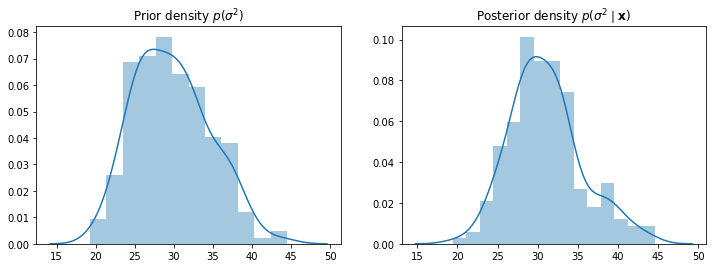

In [114]:
X =  dist.InverseGamma(38, 1110)
prior_sample = [pyro.sample("n", X) for i in range(200)]
Y =  dist.InverseGamma(46, 1380)
posterior_sample = [pyro.sample("m", Y) for i in range(200)]

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(prior_sample, ax=axes[0])
sns.distplot(posterior_sample, ax=axes[1])
axes[0].set_title('Prior density $p(\sigma^2)$')
axes[1].set_title('Posterior density $p(\sigma^2 \mid \mathbf{x})$')
plt.show()

3. We can compute the posterior density of the standard deviation $\sigma$ using the theorem of transformations of univariate random variables, that states that given a random variable $X=\sigma^2$ and its transformation $Y=g(X)=\sqrt{\sigma^2}=\sigma$ with $g(\cdot) = \sqrt{\cdot}$ a monotonic function with continuous derivative in $g^{-1}(y)$ it holds
$$f_Y(y; \theta) = f_X(g^{-1}(y);\theta)\left|\frac{d}{dy}g^{-1}(y)\right|.$$
Then in our case we have that $\sigma^2 = X = g^{-1}(Y) = Y^2 = \sigma^2$, so
$$
p(\sigma \mid \underline{x}) = p(\sigma^2 \mid \underline{x}) \left|\frac{d}{d \sigma}\sigma^2\right| = \frac {1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)}\frac1 {(\sigma^2)^{47}} e^{-\frac{1380}{\sigma^2}} \cdot 2 \sigma = \frac {1110 ^{38}}{\sqrt{2\pi}^{16}\Gamma (38)}\frac{2 \sigma} {(\sigma^2)^{47}} e^{-\frac{1380}{\sigma^2}}
$$
We can show the graph of the distribution:

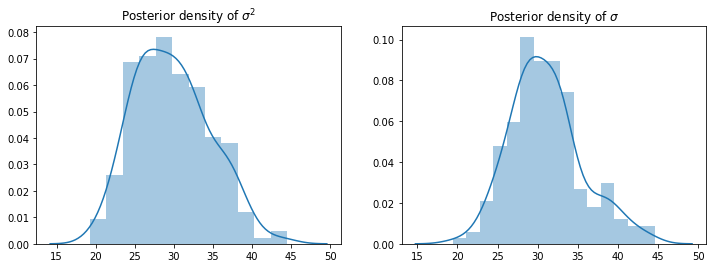

In [118]:
X =  dist.InverseGamma(46, 1380)
X_sample = [pyro.sample("n", X) for i in range(200)] 
Y_sample = np.sqrt(X_sample)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(prior_sample, ax=axes[0])
sns.distplot(posterior_sample, ax=axes[1])
axes[0].set_title('Posterior density of $\sigma^2$')
axes[1].set_title('Posterior density of $\sigma$')
plt.show()

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

**Solution.**

The probability $p(\theta)$ is the **conjugate prior** of the likelihood $p(\underline{x} \mid \theta)$ if the probability $p(\theta \mid \underline{x})$ has the same distribution of form of $p(\theta)$.

In this case we have that the likelihood has an Exponential disribution, so $p(\underline{x} \mid \theta) \sim \text{Exp}(\theta)$, then, if $\underline{x} = (x_1, x_2x \ldots, x_n)$ and setting $K = \sum_{i=1}^n x_i$ we have that

$$
p(\underline{x} \mid \theta) = \prod_{i=1}^n \theta e^{-\theta x_i} = \theta^n e^{-\theta \sum_{i=1}^n x_i} = \theta^n e^{-\theta K};
$$

and since the prior density has a Gamma distribution we have that $p(\theta) \sim \text{Gamma}(\alpha,\beta)$, then 

$$
p(\theta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\theta^{\alpha-1}e^{-\beta\theta}.
$$

So we have that

$$
p(\theta \mid \underline{x}) = \frac{p(\underline{x} \mid \theta)p(\theta)}{p(\underline{x})} \propto p(\underline{x} \mid \theta) p(\theta) = \theta^n e^{-\theta K} \cdot \frac{\beta^\alpha}{\Gamma(\alpha)}\theta^{\alpha-1}e^{-\beta\theta} = \frac{\beta^\alpha}{\Gamma(\alpha)}\theta^{\alpha + n - 1}e^{-(K + \beta)\theta}
$$

then $p(\theta \mid \underline{x}) \sim \text{Gamma}(\alpha + n, K + \beta)$, so the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.